In [8]:
import simulation
import pynbody
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
import ipywidgets

In [9]:
sim = simulation.Simulation('/media/michele/My Book/Michele/MySimulations/MovingBox/beta/mb.71002/p300_a800_r600/out')
# sim = simulation.Simulation('/home/michele/sim/MySimulations/mb.beta/beta_model.1/out')

loading simulation: /media/michele/My Book/Michele/MySimulations/MovingBox/beta/mb.71002/p300_a800_r600/out
Found parameter file
Found compiler file
Loading cosmological parameters
Found trace file


In [14]:
np.log10(0.75)

-0.12493873660829993

From hyplot:

formula: [A/B] = log10(A/B)-log10(A_sol/B_sol)

$[Mg/Fe]$

 * log10(M_mgsol/M_fesol) = -0.261299, source: Grevesse et al. 2007 en 2010
 * [Mg/Fe] = log10(M_Mg/M_Fe)-log10(M_Mg_sol/M_Fe_sol)
    
$[Fe/H]$

 * [Fe/H]_sol = - 2.756433 (see Valcke masters thesis)
 * log10(Fe_mass / particleMass) + 2.756433 (see Valcke masters thesis).


In [10]:
MgFe_sol = -0.261299
FeH_sol = -2.756433

In [11]:
tot_m_star = snap.s['mass'].sum()
tot_m_star

SimArray(0.01177049707621336, dtype=float32, '1.00e+10 Msol')

In [22]:
# snap.s['mgfe'] = np.log10(snap.s['mgst']/snap.s['fest']) - MgFe_sol
# snap.s['mgfe'][np.logical_or(snap.s['mgst'] == 0.0, snap.s['fest'] == 0.0)] = 0.471782

/home/michele/Software/miniconda3/lib/python3.6/site-packages/pynbody-0.45-py3.6-linux-x86_64.egg/pynbody/array.py:346: RuntimeWarning: invalid value encountered in true_divide
  return np.ndarray.__truediv__(self, rhs)


In [23]:
def mgfe(snap):
    arr = np.log10(snap.s['mgst']/snap.s['fest']) - MgFe_sol
    arr[np.logical_or(snap.s['mgst'] == 0.0, snap.s['fest'] == 0.0)] = 0.471782
    return arr #np.log10(snap.s['mgst']/snap.s['fest']) - MgFe_sol

def feh(snap):
    return np.log10(snap.s['fest']/snap.s['mass']) - FeH_sol

In [27]:
snap.s['age'].shape

(14052,)

In [57]:
from pynbody import filt
popIII_filt = filt.BandPass('feh', -5, 100)

In [93]:
snap_slider = ipywidgets.IntSlider(min=0,max=len(sim)-1,step=1,value=0, continuous_update=False, description='Snap:')
def k(i):
    snap = sim[i].s
    snap.s['mgfe'] = mgfe(snap)
    snap.s['feh'] = feh(snap)

    subsnap = snap[popIII_filt]

#     snap.s['mgfe'] = np.log10(snap.s['mgst']/snap.s['fest']) - MgFe_sol
#     snap.s['feh'] = np.log10(snap.s['fest']/snap.s['mass']) - FeH_sol

    fig, ax = plt.subplots(1, figsize=(6,4))
    ax.set_xlabel('[Fe/H]')
    ax.set_ylabel('[Mg/Fe]')
    scatter = ax.scatter(subsnap.s['feh'], subsnap.s['mgfe'], alpha = 0.3, s=10, c=subsnap.s['age'])
    fig.colorbar(scatter)
    ax.set_title('time: {:.2f}'.format(sim[i].header.time))
    return fig

w = ipywidgets.interactive(k, i=snap_slider)
#                         velocity_proj=_proj,
#                         sfh=_sfh,
#                         cog=_traj,
#                         vrange=_vminmax,
#                         width=_width_slider,
#                         resolution=_res_slider)
w

interactive(children=(IntSlider(value=0, continuous_update=False, description='Snap:', max=446), Output()), _dom_classes=('widget-interact',))

In [94]:
snap = sim[260].s
snap.s['mgfe'] = mgfe(snap)
snap.s['feh'] = feh(snap)
subsnap = snap[popIII_filt]

/home/michele/Software/miniconda3/lib/python3.6/site-packages/pynbody-0.45-py3.6-linux-x86_64.egg/pynbody/array.py:346: RuntimeWarning: invalid value encountered in true_divide
  return np.ndarray.__truediv__(self, rhs)
/home/michele/Software/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log10
  


In [95]:
df = pd.DataFrame({k: subsnap.s[k] for k in ['mgfe', 'feh', 'age']})
df.head()

,age,feh,mgfe
0,2.153999,-1.838044,-0.544604
1,6.804740,-3.249241,-0.538687
2,4.272181,-1.372240,0.456067
3,5.560349,-3.042408,0.048616
4,5.345648,-2.580615,0.293293


In [96]:
df_clean=df.dropna()
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5870 entries, 0 to 5869
Data columns (total 3 columns):
age     5870 non-null float32
feh     5870 non-null float32
mgfe    5870 non-null float32
dtypes: float32(3)
memory usage: 114.6 KB


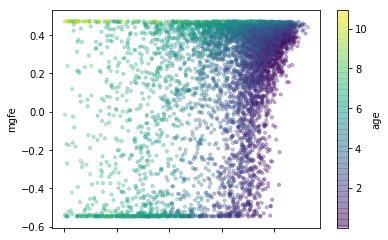

In [99]:
# plt.scatter(df_clean.feh, df_clean.mgfe, alpha = 0.2)
df_clean.plot.scatter('feh', 'mgfe', alpha=0.3, s=10, c='age', colormap='viridis');

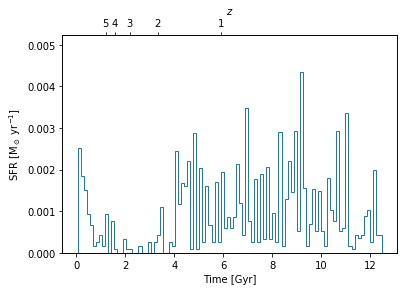

In [102]:
fig2, ax_sfh = plt.subplots(1)
sim.plot_sfh(ax_sfh);